In [1]:
#from datetime import datetime
import numpy as np
from matplotlib import pyplot as plt
import midas.file_reader
import cygno as cy
#from tqdm import tqdm

In [2]:
mfile = cy.open_mid(run=84604, path = '../data/',
                    tag = 'LNGS', cloud = True, verbose=True)

https://s3.cloud.infn.it/v1/AUTH_2ebf769785574195bde2ff418deac08a/cygno-data/LNGS/run84604.mid.gz
https://s3.cloud.infn.it/v1/AUTH_2ebf769785574195bde2ff418deac08a/cygno-data/LNGS/run84604.mid.gz


file ../data/run84604.mid.gz cached

In [4]:
counter = 0
mfile.jump_to_start()

In [7]:
dir(mfile)

['__class__',
 '__del__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__iter__',
 '__le__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__next__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 '__weakref__',
 'event',
 'file',
 'get_bor_odb_dump',
 'get_eor_odb_dump',
 'get_event_count',
 'get_next_event_with_bank',
 'jump_to_start',
 'next',
 'next_event_offset',
 'open',
 'read_next_event',
 'read_next_event_header',
 'read_this_event_body',
 'reset_event',
 'this_event_payload_offset',
 'use_numpy']

In [14]:
mfile.event.banks.items()

dict_items([])

In [17]:
counter = 0
counter_F = 0

mfile.jump_to_start()
for event in mfile:
    if event.header.is_midas_internal_event(): # What is this??
        counter = counter + 1
    else:
        counter_F = counter_F + 1

In [18]:
print(counter)
print(counter_F)

2
522


In [ ]:
mfile.jump_to_start()

In [35]:
event = mfile.next()
event.header.event_id

1

In [36]:
event.banks

{'DIG0': <midas.event.Bank at 0x7f63743f4af0>,
 'DGH0': <midas.event.Bank at 0x7f63743f4eb0>,
 'CAM0': <midas.event.Bank at 0x7f6374399970>}

In [38]:
# This function comes from https://github.com/CYGNUS-RD/cygno/blob/main/cygno/__init__.py
# It just read the data with event.banks['CAM0'].data and reshape it
image, _, _ = cy.daq_cam2array(event.banks['CAM0'])

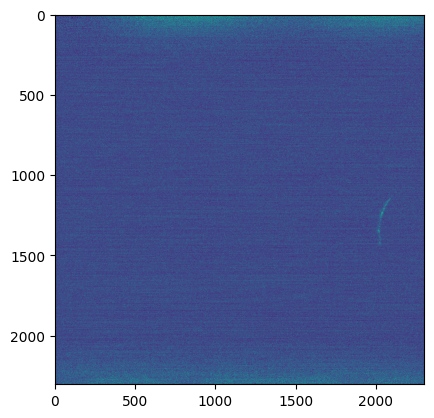

In [40]:
plt.imshow(image, vmin=95, vmax=120)

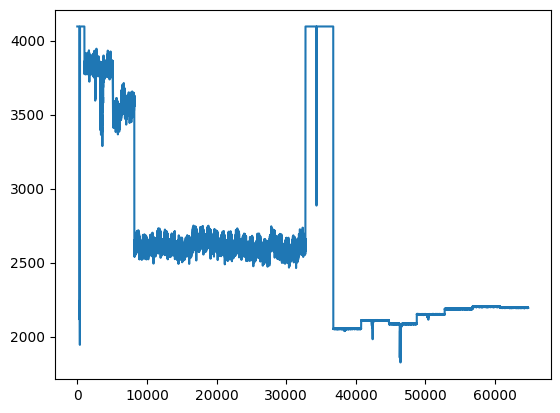

In [50]:
plt.plot(np.asarray(event.banks['DIG0'].data))

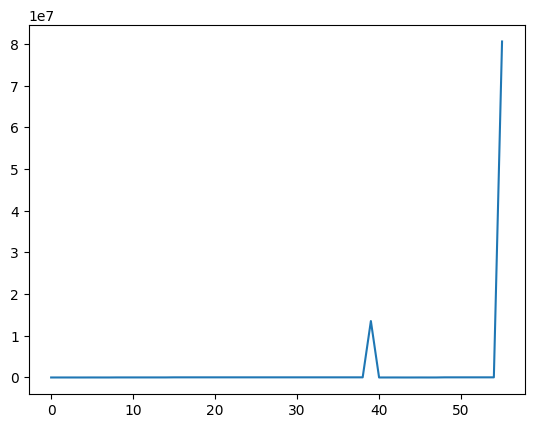

In [49]:
plt.plot(np.asarray(event.banks['DGH0'].data))